In [1]:
import os
os.chdir('..')
print(f'Current working directory is {os.getcwd()}')

Current working directory is C:\Users\Gubbz\Documents\NSS\NSS_Projects\open-secrets-skittles


In [2]:
# from folder.file import function_name
# import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from data.Skittles_collection import state_code_df, get_all_districts

In [4]:
#state_code_df();
#get_all_districts().to_csv('../open-secrets-skittles/data/States_df.csv', index = False) 

In [5]:
States_df = pd.read_csv('data/States_clean_df.csv')

In [6]:
States_df['Party'] = States_df['FirstLastP'].str.split(' ').str[-1]

In [7]:
States_df

,State,District,FirstLastP,Party,Raised,Spent,Difference,Outcome,Winner,CRPICO
0,Alabama,1,Jerry Carl (R),(R),1971321.50,1859348.91,111972.59,W,1,O
1,Alabama,1,James Averhart (D),(D),80094.95,78973.24,1121.71,L,0,O
2,Alabama,2,Barry Moore (R),(R),650806.75,669367.70,-18560.95,W,1,O
3,Alabama,2,Phyllis Harvey-Hall (D),(D),56049.68,55988.07,61.61,L,0,O
4,Alabama,3,Mike D Rogers (R),(R),1193111.43,1218563.76,-25452.33,W,1,I
...,...,...,...,...,...,...,...,...,...,...
846,Wisconsin,7,Tricia Zunker (D),(D),1261957.30,1232690.26,29267.04,L,0,C
847,Wisconsin,8,Mike Gallagher (R),(R),3202904.74,2841800.71,361104.03,W,1,I
848,Wisconsin,8,Amanda Stuck (D),(D),416978.45,399915.94,17062.51,L,0,C
849,Wyoming,1,Liz Cheney (R),(R),3003883.34,3060166.78,-56283.44,W,1,I


In [96]:
States_df = States_df.rename(columns = {'CRPICO':'Incumbent Status'})
States_df = States_df[States_df['Raised'] > 0]

In [98]:
def clean_data(dataframe):
    dataframe = dataframe.drop(
        columns = ['Incumbent','primarydate', 'sort', 'capeye','SmLgIndivsNote','enddate','ReleaseDate','cid', 'Spent']
    )
    dataframe = dataframe.rename(columns = {'Rcpts':'Raised', 'Indivs':'Total_Indiv_Contribution', 'Cand':'Self_Financing', 'CRPICO':'Incumbent Status'})
    return dataframe

e. Can you detect any relationship between amount of money raised and the incumbent status of a candidate?

In [142]:
incumbent = States_df[States_df['Incumbent Status'] == 'I']
open = States_df[States_df['Incumbent Status'] == 'O']
challenger = States_df[States_df['Incumbent Status'] == 'C']

party_states = States_df[(States_df['Party'] == '(D)') | (States_df['Party'] == '(R)')]
party_states

,State,District,FirstLastP,Party,Raised,Spent,Difference,Outcome,Winner,Incumbent Status
0,Alabama,1,Jerry Carl (R),(R),1971321.50,1859348.91,111972.59,W,1,O
1,Alabama,1,James Averhart (D),(D),80094.95,78973.24,1121.71,L,0,O
2,Alabama,2,Barry Moore (R),(R),650806.75,669367.70,-18560.95,W,1,O
3,Alabama,2,Phyllis Harvey-Hall (D),(D),56049.68,55988.07,61.61,L,0,O
4,Alabama,3,Mike D Rogers (R),(R),1193111.43,1218563.76,-25452.33,W,1,I
...,...,...,...,...,...,...,...,...,...,...
846,Wisconsin,7,Tricia Zunker (D),(D),1261957.30,1232690.26,29267.04,L,0,C
847,Wisconsin,8,Mike Gallagher (R),(R),3202904.74,2841800.71,361104.03,W,1,I
848,Wisconsin,8,Amanda Stuck (D),(D),416978.45,399915.94,17062.51,L,0,C
849,Wyoming,1,Liz Cheney (R),(R),3003883.34,3060166.78,-56283.44,W,1,I


In [132]:
incumbent['Raised'].describe()

count    3.860000e+02
mean     2.821432e+06
std      3.860280e+06
min      3.277270e+05
25%      1.075137e+06
50%      1.700519e+06
75%      3.004570e+06
max      3.726283e+07
Name: Raised, dtype: float64

In [134]:
open['Raised'].describe()

count    1.110000e+02
mean     1.698053e+06
std      1.971455e+06
min      5.700000e+02
25%      9.908761e+04
50%      1.392822e+06
75%      2.586993e+06
max      1.123967e+07
Name: Raised, dtype: float64

In [136]:
challenger['Raised'].describe()

count    3.490000e+02
mean     1.033867e+06
std      1.853284e+06
min      1.000000e+02
25%      2.895528e+04
50%      1.430885e+05
75%      1.245767e+06
max      1.205056e+07
Name: Raised, dtype: float64

In [109]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns

C:\Users\Gubbz\anaconda3\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


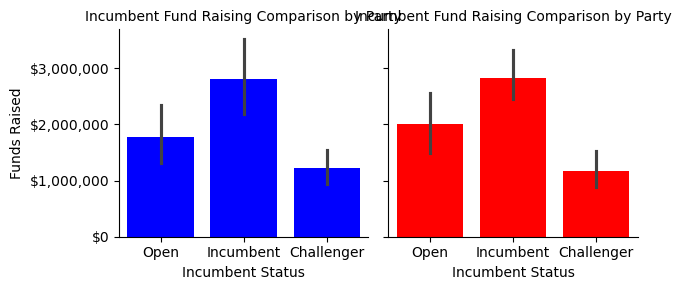

In [243]:
g = sns.FacetGrid(party_states, col= 'Party')
g.map(sns.barplot, 'Incumbent Status', 'Raised')
g.set_axis_labels('Incumbent Status', 'Funds Raised')
g.set_titles('Incumbent Fund Raising Comparison by Party')

row_colors = ['blue','red']
for ax, color in zip(g.axes.flat, row_colors):
    for patch in ax.patches:
        patch.set_facecolor(color)


ax.yaxis.set_major_formatter('${x:,.0f}')
plt.yticks(rotation=45)
plt.xticks(ticks=['O','I','C'], labels=['Open', 'Incumbent', 'Challenger'])
plt.show()
g.savefig('C:/Users/Gubbz/Documents/NSS/NSS_Projects/open-secrets-skittles/images/IncumbentStatus_vs_MoneyRaised_Barplot.png', dpi=150)

C:\Users\Gubbz\anaconda3\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


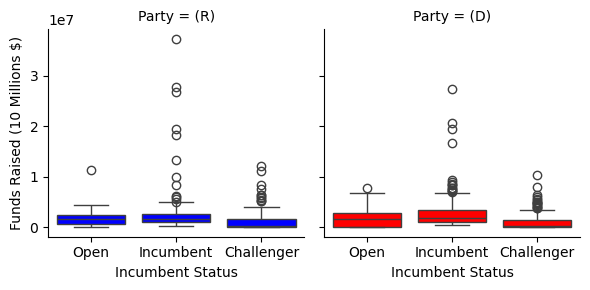

In [194]:
gg = sns.FacetGrid(party_states, col= 'Party', margin_titles=True)
gg.map(sns.boxplot, 'Incumbent Status', 'Raised')
gg.set_axis_labels('Incumbent Status', 'Funds Raised (10 Millions $)')

row_colors = ['blue','red']
for ax, color in zip(gg.axes.flat, row_colors):
    for patch in ax.patches:
        patch.set_facecolor(color)

plt.xticks(ticks=['O','I','C'], labels=['Open', 'Incumbent', 'Challenger'])
plt.show()
gg.savefig('C:/Users/Gubbz/Documents/NSS/NSS_Projects/open-secrets-skittles/images/IncumbentStatus_vs_MoneyRaised_Boxplot.png', dpi=150)

In [196]:
raised_means = party_states.groupby(['State','Incumbent Status', 'Party']).agg({'Raised':'mean'}).reset_index().rename(columns = {'Raised':'Mean_Raised'})
raised_means

,State,Incumbent Status,Party,Mean_Raised
0,Alabama,C,(D),50273.200
1,Alabama,I,(D),2168165.010
2,Alabama,I,(R),1002692.780
3,Alabama,O,(D),68072.315
4,Alabama,O,(R),1311064.125
...,...,...,...,...
193,Wisconsin,I,(R),2789242.360
194,Wisconsin,O,(D),370392.340
195,Wisconsin,O,(R),1155720.780
196,Wyoming,C,(D),134597.320


C:\Users\Gubbz\anaconda3\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


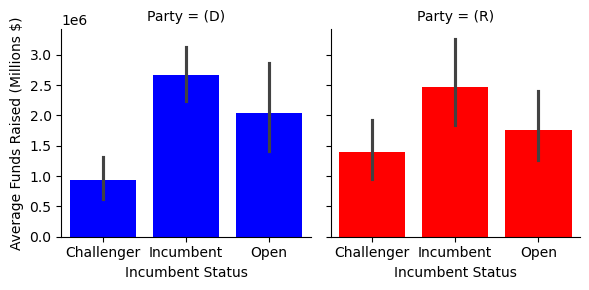

In [198]:
ggg = sns.FacetGrid(raised_means, col= 'Party')
ggg.map(sns.barplot, 'Incumbent Status', 'Mean_Raised')
ggg.set_axis_labels('Incumbent Status', 'Average Funds Raised (Millions $)')

row_colors = ['blue','red']
for ax, color in zip(ggg.axes.flat, row_colors):
    for patch in ax.patches:
        patch.set_facecolor(color)

plt.xticks(ticks=['O','I','C'], labels=['Open', 'Incumbent', 'Challenger'])
plt.show()
ggg.savefig('C:/Users/Gubbz/Documents/NSS/NSS_Projects/open-secrets-skittles/images/IncumbentStatus_vs_MeanMoneyRaised_Barplot.png', dpi=150)

C:\Users\Gubbz\anaconda3\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


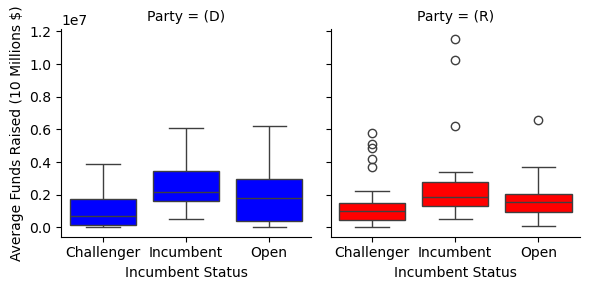

In [199]:
gggg = sns.FacetGrid(raised_means, col= 'Party')
gggg.map(sns.boxplot, 'Incumbent Status', 'Mean_Raised')
gggg.set_axis_labels('Incumbent Status', 'Average Funds Raised (10 Millions $)')

row_colors = ['blue','red']
for ax, color in zip(gggg.axes.flat, row_colors):
    for patch in ax.patches:
        patch.set_facecolor(color)

plt.xticks(ticks=['O','I','C'], labels=['Open', 'Incumbent', 'Challenger'])
plt.ylabel = ""
plt.show()
gggg.savefig('C:/Users/Gubbz/Documents/NSS/NSS_Projects/open-secrets-skittles/images/IncumbentStatus_vs_MeanMoneyRaised_Boxplot.png', dpi=150)

In [201]:
party = raised_means[(raised_means['Party'] == '(D)') | (raised_means['Party'] == '(R)')]
party

,State,Incumbent Status,Party,Mean_Raised
0,Alabama,C,(D),50273.200
1,Alabama,I,(D),2168165.010
2,Alabama,I,(R),1002692.780
3,Alabama,O,(D),68072.315
4,Alabama,O,(R),1311064.125
...,...,...,...,...
193,Wisconsin,I,(R),2789242.360
194,Wisconsin,O,(D),370392.340
195,Wisconsin,O,(R),1155720.780
196,Wyoming,C,(D),134597.320


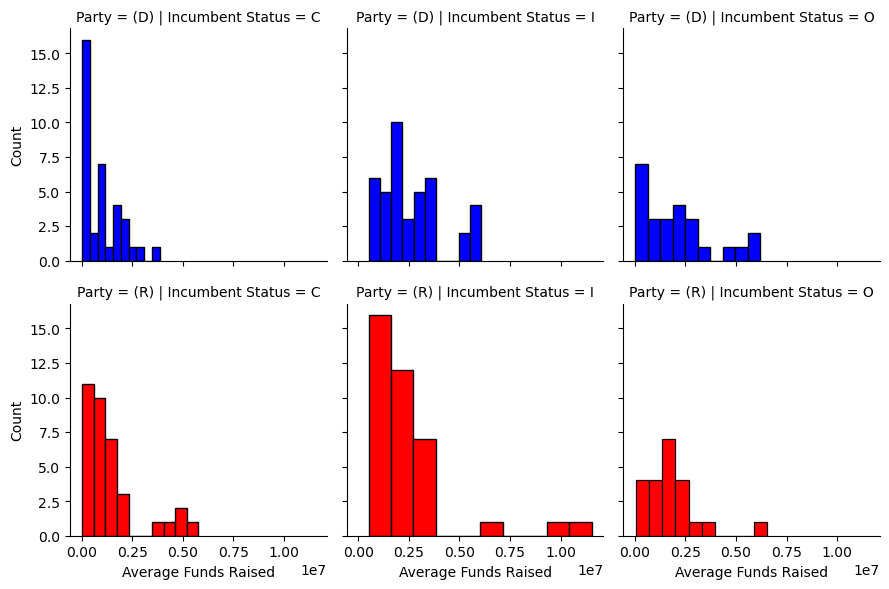

In [204]:
ggggg = sns.FacetGrid(party, col= 'Incumbent Status', row = 'Party')
ggggg.map(sns.histplot, 'Mean_Raised', bins=10)
ggggg.set_axis_labels('Average Funds Raised')

row_colors = ['blue','blue','blue', 'red','red','red']
for ax, color in zip(ggggg.axes.flat, row_colors):
    for patch in ax.patches:
        patch.set_facecolor(color)

plt.show()
ggggg.savefig('C:/Users/Gubbz/Documents/NSS/NSS_Projects/open-secrets-skittles/images/IncumbentStatus_vs_MeanMoneyRaised_Histograms.png', dpi=150)

In [205]:
incumbent_mean = party[party['Incumbent Status'] == 'I']
open_mean = party[party['Incumbent Status'] == 'O']
challenger_mean = party[party['Incumbent Status'] == 'C']